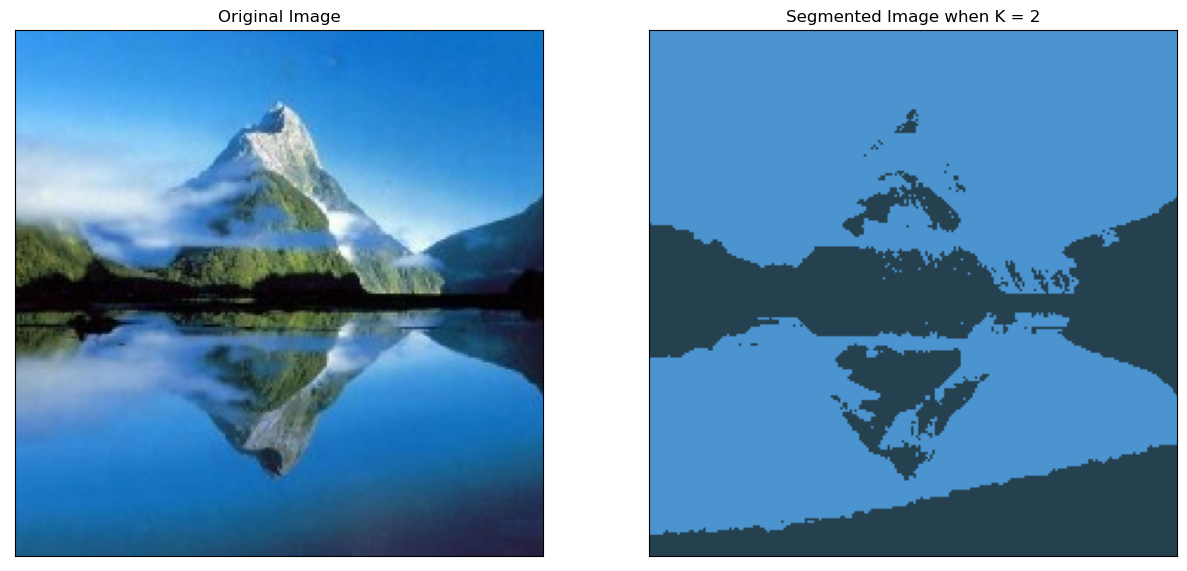

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = '/Users/werther/image/'
src = cv2.imread(path+'watershed_mountains.jpeg')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

def kmeans(img, K) : 
    #Next, converts the MxNx3 image into a Kx3 matrix 
    #where K=MxN and each row is now a vector in the 3-D space of RGB.
    vectorized = img.reshape((-1,3))

    #We convert the unit8 values to float 
    #as it is a requirement of the k-means method of OpenCV.
    vectorized = np.float32(vectorized)

    #We are going to cluster with k = 3 
    #because if you look at the image above it has 3 colors, 
    #green-colored grass and forest, blue sea and the greenish-blue seashore.
    #Define criteria, number of clusters(K) and apply k-means()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    K = K
    attempts=10
    ret,label,center=cv2.kmeans(vectorized, K, None, criteria,
                                attempts,cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)

    res = center[label.flatten()]
    result_image = res.reshape((img.shape))

    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()
    
kmeans(img, 2)

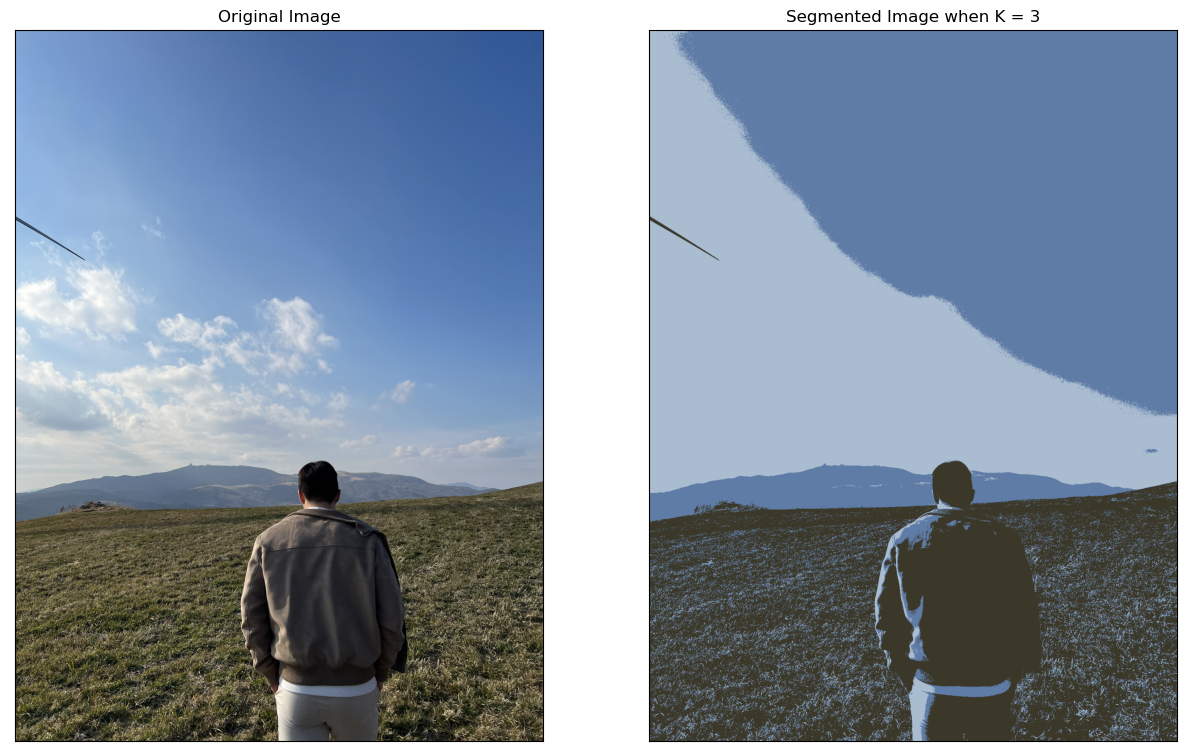

In [10]:
path = '/Users/werther/image/'
src = cv2.imread(path+'Kmeans_sample.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    
kmeans(img, 3)

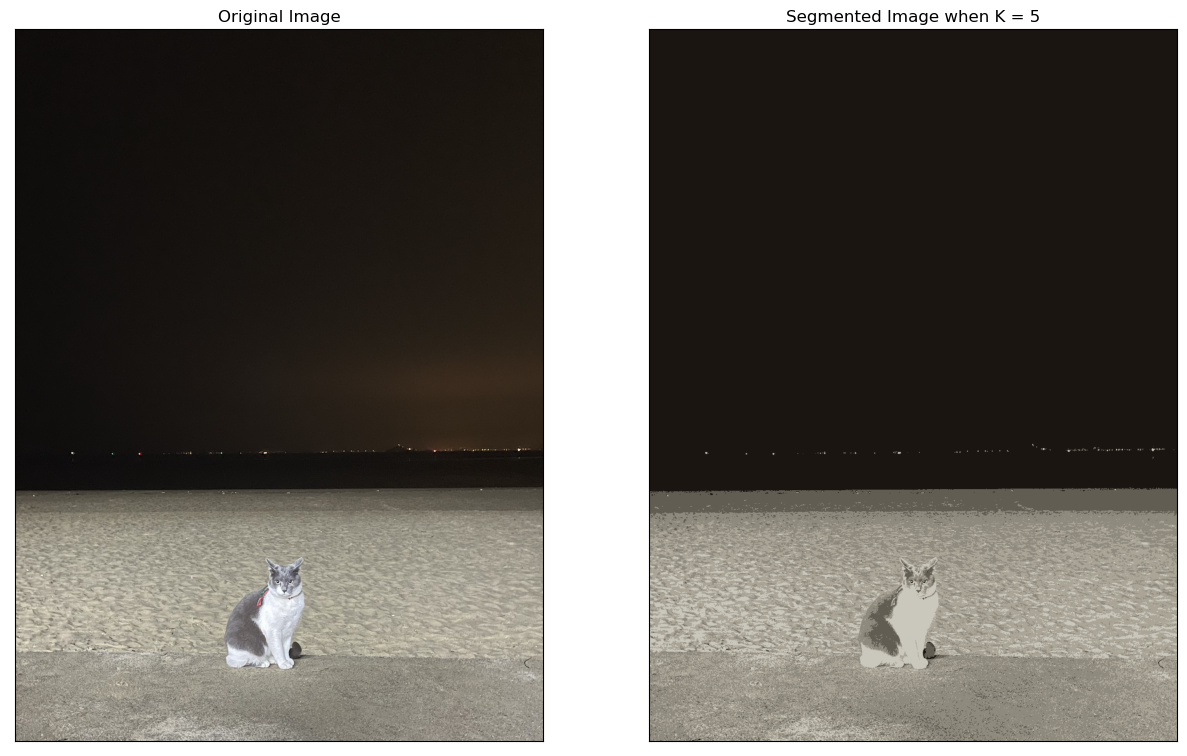

In [12]:
path = '/Users/werther/image/'
src = cv2.imread(path+'Kmeans_sample2.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    
kmeans(img, 5)